# Описание проекта

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
- /datasets/geo_data_0.csv. Скачать датасет
- /datasets/geo_data_1.csv. Скачать датасет
- /datasets/geo_data_2.csv. Скачать датасет

 - id — уникальный идентификатор скважины;
 - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
 - product — объём запасов в скважине (тыс. баррелей).

#### Условия задачи:

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

# 1. Загрузка и подготовка данных

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from sklearn.linear_model import LinearRegression

In [35]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [36]:
data_0 = data_0.drop(columns=['id'])
data_1 = data_1.drop(columns=['id'])
data_2 = data_2.drop(columns=['id'])

In [37]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [38]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


In [39]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4)
memory usage: 3.1 MB


### data_0

In [40]:
#Разобью данные на выборки

data_0_train, data_0_valid = train_test_split(data_0, test_size=0.25, random_state=12345) 

features_train_0 = data_0_train.drop(['product'], axis=1)
target_train_0 = data_0_train['product']
features_valid_0 = data_0_valid.drop(['product'], axis=1)
target_valid_0 = data_0_valid['product'] 

In [41]:
data_0_train, data_0_test = train_test_split(data_0_train, test_size=0.25, random_state=12345) 

features_train_0 = data_0_train.drop(['product'], axis=1)
target_train_0 = data_0_train['product']
features_test_0 = data_0_test.drop(['product'], axis=1)
target_test_0 = data_0_test['product'] 

### data_1

In [42]:
#Разобью данные на выборки

data_1_train, data_1_valid = train_test_split(data_1, test_size=0.25, random_state=12345) 

features_train_1 = data_1_train.drop(['product'], axis=1)
target_train_1 = data_1_train['product']
features_valid_1 = data_1_valid.drop(['product'], axis=1)
target_valid_1 = data_1_valid['product'] 

In [43]:
data_1_train, data_1_test = train_test_split(data_1_train, test_size=0.25, random_state=12345) 

features_train_1 = data_1_train.drop(['product'], axis=1)
target_train_1 = data_1_train['product']
features_test_1 = data_1_test.drop(['product'], axis=1)
target_test_1 = data_1_test['product'] 

### data_2

In [44]:
#Разобью данные на выборки

data_2_train, data_2_valid = train_test_split(data_2, test_size=0.25, random_state=12345) 

features_train_2 = data_2_train.drop(['product'], axis=1)
target_train_2 = data_2_train['product']
features_valid_2 = data_2_valid.drop(['product'], axis=1)
target_valid_2 = data_2_valid['product'] 

In [45]:
data_2_train, data_2_test = train_test_split(data_2_train, test_size=0.25, random_state=12345) 

features_train_2 = data_2_train.drop(['product'], axis=1)
target_train_2 = data_2_train['product']
features_test_2 = data_2_test.drop(['product'], axis=1)
target_test_2 = data_2_test['product'] 

# 2. Обучение и проверка модели

### Линейная регрессия

### data_0

In [46]:
LR_model_0 = LinearRegression()  
LR_model_0.fit(features_train_0, target_train_0) 
LR_predictions_valid_0 = LR_model_0.predict(features_valid_0) 
LR_result_0 = mean_squared_error(target_valid_0, LR_predictions_valid_0) ** 0.5 
print("Средний объем предсказанного сырья:", LR_predictions_valid_0.mean())
print("Корень из средней квадратичной ошибки (RMSE модели):", LR_result_0)

Средний объем предсказанного сырья: 92.61499479823341
Корень из средней квадратичной ошибки (RMSE модели): 37.57859599560352


In [47]:
LR_PV_200_0 = pd.Series(LR_predictions_valid_0).sort_values(ascending = False)[:200]
LR_PV_200_0.mean()

155.47027002106339

In [48]:
#Средний объем предсказанного сырья
LR_predictions_valid_0.mean()

92.61499479823341

##### Проверка модели на тестовых данных

In [49]:
LR_result_test_0 = 0
LR_predictions_test_0 = LR_model_0.predict(features_test_0) 
LR_result_test_0 = mean_squared_error(target_test_0, LR_predictions_test_0) ** 0.5  
 
print("корень из средней квадратичной ошибки на тестовой выборке:", LR_result_test_0)

корень из средней квадратичной ошибки на тестовой выборке: 37.68390293181179


### data_1

In [50]:
LR_model_1 = LinearRegression()  
LR_model_1.fit(features_train_1, target_train_1)

LR_predictions_valid_1 = LR_model_1.predict(features_valid_1) 
LR_result_1 = mean_squared_error(target_valid_1, LR_predictions_valid_1) ** 0.5 
print("Средний объем предсказанного сырья:", LR_predictions_valid_1.mean())
print("Корень из средней квадратичной ошибки (RMSE модели):", LR_result_1)

Средний объем предсказанного сырья: 68.7300334175629
Корень из средней квадратичной ошибки (RMSE модели): 0.8931406544992097


In [51]:
LR_PV_200_1 = pd.Series(LR_predictions_valid_1).sort_values(ascending = False)[:200]
LR_PV_200_1.mean()

138.72593529547873

In [52]:
#Средний объем предсказанного сырья
LR_predictions_valid_1.mean()

68.7300334175629

##### Проверка модели на тестовых данных

In [53]:
LR_result_test_1 = 0
#LR_predictions_test_1 = LR_model_0.predict(features_test_1) 
LR_predictions_test_1 = LR_model_1.predict(features_test_1) 
LR_result_test_1 = mean_squared_error(target_test_1, LR_predictions_test_1) ** 0.5  
 
print("Корень из средней квадратичной ошибки на тестовой выборке:", LR_result_test_1)

Корень из средней квадратичной ошибки на тестовой выборке: 0.8902570674784577


### data_2

In [54]:
LR_model_2 = LinearRegression()  
LR_model_2.fit(features_train_2, target_train_2)
LR_predictions_valid_2 = LR_model_2.predict(features_valid_2) 
LR_result_2 = mean_squared_error(target_valid_2, LR_predictions_valid_2) ** 0.5 
print("Средний объем предсказанного сырья:", LR_predictions_valid_2.mean())
print("Корень из средней квадратичной ошибки (RMSE модели):", LR_result_2)

Средний объем предсказанного сырья: 94.92374279594554
Корень из средней квадратичной ошибки (RMSE модели): 40.02977029780437


In [55]:
LR_PV_200_2 = pd.Series(LR_predictions_valid_2).sort_values(ascending = False)[:200]
LR_PV_200_2.mean()

147.94634930170713

In [56]:
#Средний объем предсказанного сырья
LR_predictions_valid_2.mean()

94.92374279594554

##### Проверка модели на тестовых данных

In [57]:
LR_result_test_2 = 0
LR_predictions_test_2 = LR_model_2.predict(features_test_2) 
LR_result_test_2 = mean_squared_error(target_test_2, LR_predictions_test_2) ** 0.5  
 
print("корень из средней квадратичной ошибки на тестовой выборке:", LR_result_test_2)

корень из средней квадратичной ошибки на тестовой выборке: 39.806818380368185


# 3. Подготовка к расчёту прибыли

Рассчитаю достаточный объём сырья для безубыточной разработки новой скважины. 

Сравню полученный объём сырья со средним запасом в каждом регионе.

In [58]:
budget = 10e9

In [59]:
income = 450e3

In [60]:
well_count = 200

In [61]:
V = budget/income/well_count
V

111.11111111111111

##### Вывод: 

достаточный объем сырья для безубыточной разработки новой скважины составляет 111 тыс.баррелей. 

При этом средний объем запасов в каждом регионе составляет примерно 93, <font color='blue'> 69 </font>  и 95 тыс. баррелей соответственно. 

# 4. Расчёт прибыли и рисков 

#### Функция расчета прибыли

In [62]:
def profit(target_valid,pred_valid, n):
    predictions_valid_sorted = pd.Series(pred_valid).sort_values(ascending=False)
    target_valid_selected = target_valid[predictions_valid_sorted.index][:n]#.reset_index(drop=True)[:n]
    result = target_valid_selected.sum() * income - budget
    return result

### data_0

In [63]:
target_0 = target_valid_0.reset_index(drop=True)
predictions_0 = pd.Series(LR_predictions_valid_0)

BOOTSTRAP_S =1000
SAMPLE_S =500

state = np.random.RandomState(12345)

profit_values_0 = []
for i in range(BOOTSTRAP_S):
    t_sample_0 = target_0.sample(SAMPLE_S, replace=True, random_state=state)
    pred_sample_0 = predictions_0[t_sample_0.index]
    profit_values_0.append(profit(t_sample_0, pred_sample_0,200))
profit_values_0 = pd.Series(profit_values_0)

mean_profit_0 = profit_values_0.mean()
confidence_interval = (profit_values_0.quantile(0.025), profit_values_0.quantile(0.975))
risk = ((profit_values_0 < 0).mean()* 100, "%")

print("-- Регион", 0, "--")
print("Средняя прибыль =", mean_profit_0)
print("95%-ый доверительный интервал:", confidence_interval)
print("Риск убытков =", risk)
print()

-- Регион 0 --
Средняя прибыль = 426488926.63111013
95%-ый доверительный интервал: (-98964117.1754137, 947862568.0466598)
Риск убытков = (5.8999999999999995, '%')



### data_1

In [64]:
target_1 = target_valid_1.reset_index(drop=True)
predictions_1 = pd.Series(LR_predictions_valid_1)

BOOTSTRAP_S =1000
SAMPLE_S =500

state = np.random.RandomState(12345)

profit_values_1 = []
for i in range(BOOTSTRAP_S):
    t_sample_1 = target_1.sample(SAMPLE_S, replace=True, random_state=state)
    pred_sample_1 = predictions_1[t_sample_1.index]
    profit_values_1.append(profit(t_sample_1, pred_sample_1,200))
profit_values_1 = pd.Series(profit_values_1)

mean_profit_1 = profit_values_1.mean()
confidence_interval = (profit_values_1.quantile(0.025), profit_values_1.quantile(0.975))
risk = ((profit_values_1 < 0).mean()* 100, "%")

print("-- Регион", 1, "--")
print("Средняя прибыль", mean_profit_1)
print("95%-ый доверительный интервал:", confidence_interval)
print("Риск убытков =", risk)
print()

-- Регион 1 --
Средняя прибыль 515222773.44328994
95%-ый доверительный интервал: (68873225.37050177, 931547591.2570496)
Риск убытков = (1.0, '%')



### data_2

In [65]:
target_2 = target_valid_2.reset_index(drop=True)
predictions_2 = pd.Series(LR_predictions_valid_2)

BOOTSTRAP_S =1000
SAMPLE_S =500

state = np.random.RandomState(12345)

profit_values_2 = []
for i in range(BOOTSTRAP_S):
    t_sample_2 = target_2.sample(SAMPLE_S, replace=True, random_state=state)
    pred_sample_2 = predictions_2[t_sample_2.index]
    profit_values_2.append(profit(t_sample_2, pred_sample_2,200))
profit_values_2 = pd.Series(profit_values_2)

mean_profit_2 = profit_values_2.mean()
confidence_interval = (profit_values_2.quantile(0.025), profit_values_2.quantile(0.975))
risk = ((profit_values_2 < 0).mean()* 100, "%")

print("-- Регион", 2, "--")
print("Средняя прибыль =", mean_profit_2)
print("95%-ый доверительный интервал:", confidence_interval)
print("Риск убытков =", risk)
print()

-- Регион 2 --
Средняя прибыль = 434867327.85413647
95%-ый доверительный интервал: (-125290536.41879854, 970873077.760011)
Риск убытков = (6.4, '%')



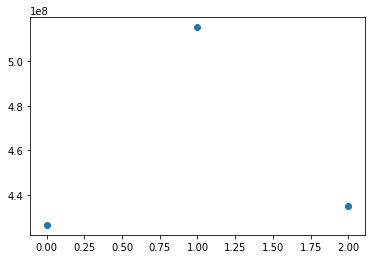

In [66]:
data = np.array([
    [0, mean_profit_0],
    [1, mean_profit_1],
    [2, mean_profit_2],
])
x, y = data.T
plt.scatter(x,y)
plt.show()

##### Вывод: 

Для разработки месторождений следует выбрать регион_1, так как у него наибльшая средняя рассчитанная прибыль (515 млрд. руб.) и наименьшие риски убытков(1%).  